In [24]:
import PIL

класс Image. подробнее https://pillow.readthedocs.io/en/stable/reference/Image.html

In [25]:
from PIL import Image

загрузим кiта

In [26]:
im = Image.open("kitty.jpg")

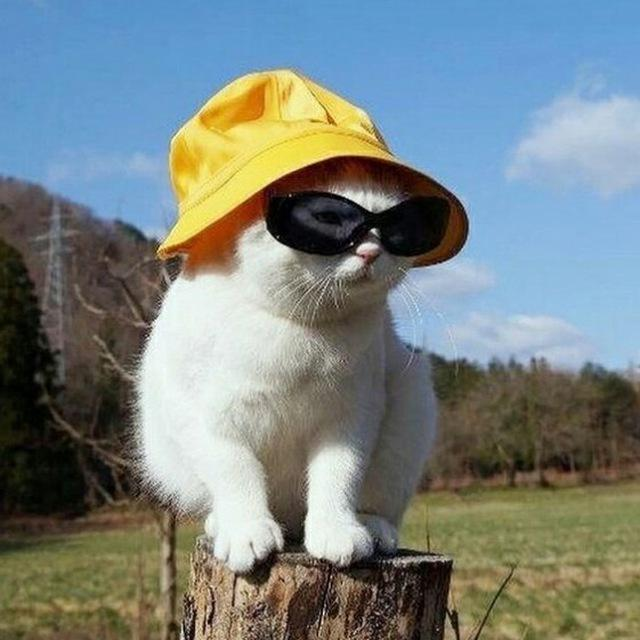

In [27]:
im

In [28]:
im.size

(640, 640)

уменьшим размер

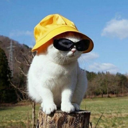

In [29]:
im1 = im.resize([128, 128])
im1

In [30]:
im1.size

(128, 128)

также можно обрезать по координатам

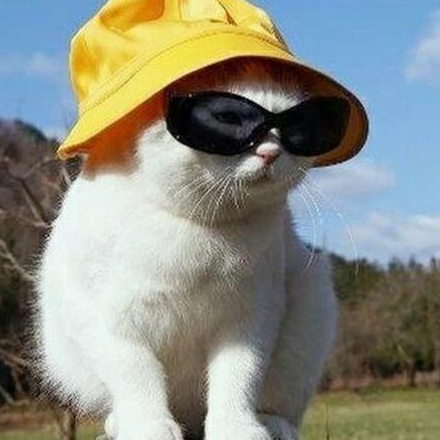

In [31]:
im.crop((100, 100, 540, 540))

или повернуть

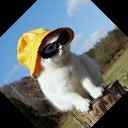

In [32]:
im2 = im1.rotate(45)
im2

можно наложить друг на друга

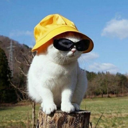

In [33]:
Image.blend(im1, im2, 0)

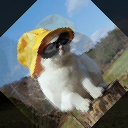

In [34]:
PIL.Image.blend(im1, im2, 0.8)

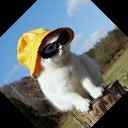

In [35]:
PIL.Image.blend(im1, im2, 1)

изменяет каждый пиксель согласно некоторому правилу. насколько я понимаю, изменяет значение цветовой функции

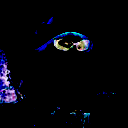

In [36]:
Image.eval(im1, (lambda x: 256 - 15*x)) 

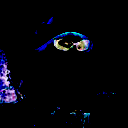

In [37]:
im1.point(lambda x: 256 - 15*x)

можно разбить на несколько однотонных изображений - полос, а потом собрать обратно

In [38]:
im1.mode

'RGB'

In [39]:
im1.load()
r, g, b = im1.split()

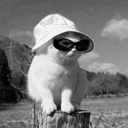

In [40]:
r

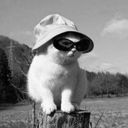

In [41]:
g

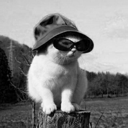

In [42]:
b

их можно собрать вместе различными способами с помощью метода merge. первыи аргументом - mode, вторым - кортеж из полос. все режимы можно посмотреть тут https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

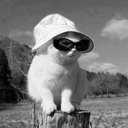

In [43]:
Image.merge("RGB", (r, r, r))

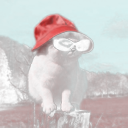

In [44]:
Image.merge("RGBA", (g, b, b, r))

с помощью тех же модов можно конвертировать изображения

In [45]:
im1.mode

'RGB'

In [46]:
im1.save("kitty_png.png")

In [47]:
im3 = Image.open("kitty_png.png")

полосы можно обрабатывать:

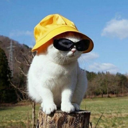

In [48]:
source = im1.split()

R, G, B = 0, 1, 2

# выбираем регионы, где красный цвет меньше 100
mask = source[R].point(lambda i: i < 100)

# обрабатываем зеленую полосу
out = source[G].point(lambda i: i * 0.7)

# вставим обработанную полосу обратно, но только там, где красный был <100
source[G].paste(out, None, mask)

# соберем все обратно
Image.merge(im.mode, source)

фильтры для изображений

In [49]:
from PIL import ImageFilter

BLUR
CONTOUR
DETAIL
EDGE_ENHANCE
EDGE_ENHANCE_MORE
EMBOSS
FIND_EDGES
SHARPEN
SMOOTH
SMOOTH_MORE

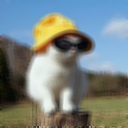

In [50]:
im1.filter(ImageFilter.BLUR)

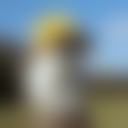

In [51]:
im1.filter(ImageFilter.GaussianBlur(radius=10))

сохраним получившуюся картинку:

In [52]:
im2.filter(ImageFilter.CONTOUR).save("contour_small_rotate_kitty.png")

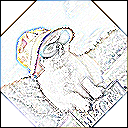

In [53]:
im3 = Image.open("contour_small_rotate_kitty.png")
im3

можно отзеркалить:

FLIP_LEFT_RIGHT, FLIP_TOP_BOTTOM, ROTATE_90, ROTATE_180, ROTATE_270 or TRANSPOSE

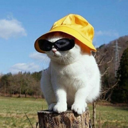

In [54]:
im1.transpose(Image.FLIP_LEFT_RIGHT)

ImageTk изображение, совместимое с модулем tkinter

In [55]:
from PIL import Image, ImageTk
from tkinter import Tk
from tkinter.ttk import Frame, Label
import sys
 
class Example(Frame):
  
    def __init__(self):
        super().__init__()   
         
        self.loadImage() 
        self.initUI()
        
        
    def loadImage(self):
        try:
            self.img = Image.open("kitty.jpg")
 
        except IOError:
            print("Unable to load image")
            sys.exit(1)
        
    
    def initUI(self):
        self.master.title("Label")
        
        kitty = ImageTk.PhotoImage(self.img)
        label = Label(self, image=kitty)
        
        
        label.image = kitty
        
        label.pack()
        self.pack()
        
        
    def setGeometry(self):
        w, h = self.img.size
        self.master.geometry(("%dx%d+300+300") % (w, h))
        
def main():
    root = Tk()
    ex = Example()
    ex.setGeometry()
    root.mainloop()  
 
 
if __name__ == '__main__':
    main()

на картино4ки можно накладывать надписи:

In [56]:
from PIL import ImageDraw, ImageFont

In [57]:
idraw = ImageDraw.Draw(im1)

text = "мурад пупсик"

font = ImageFont.truetype("arial.ttf", size=18)

idraw.text((10, 10), text, (255, 0, 0), font)

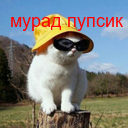

In [58]:
im1

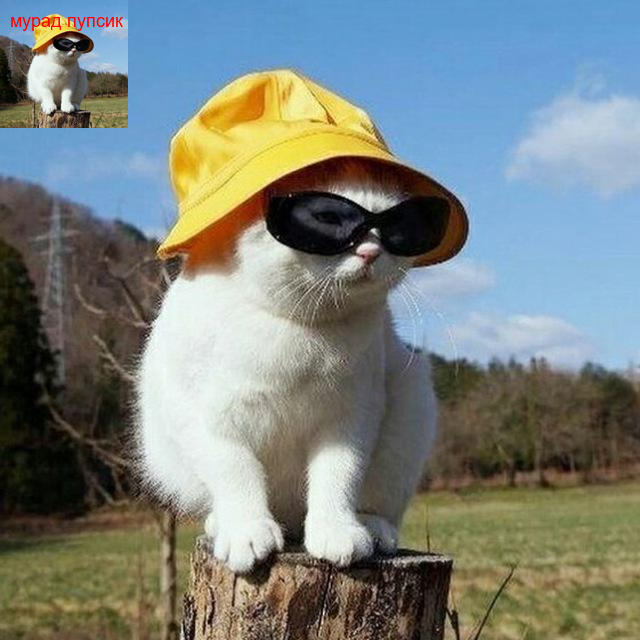

In [59]:
im.paste(im1, (0, 0))
im

можно создавать новые изображения

In [60]:
from PIL import ImageColor

In [61]:
color = ImageColor.getrgb("rgb(255,0,0)")

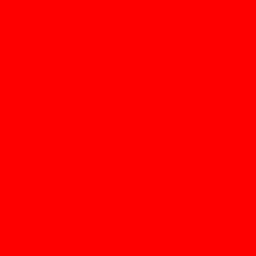

In [62]:
Image.new("RGBA", (256, 256), color)

разбросать пиксели в некотором радиусе:

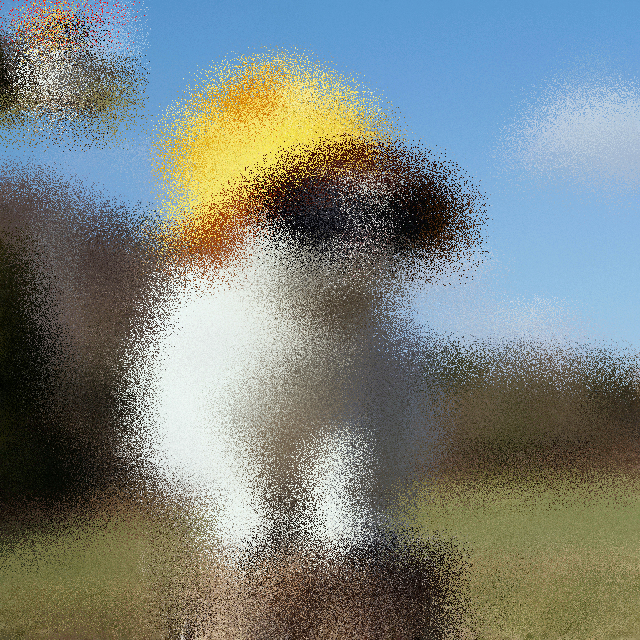

In [83]:
im.effect_spread(50)

определить размеры ненулевых областей изображения

In [84]:
im1.getbbox()

(0, 0, 128, 128)

значение цвета в пикселе

In [85]:
print(im1.getpixel((40, 40)))

(234, 217, 95)


конвертировать в массив numpy и обратно

In [86]:
import numpy as np

матрица значений цветовой функции для каждого пикселя

In [87]:
np_arr = np.array(im)
np_arr.shape

(640, 640, 3)

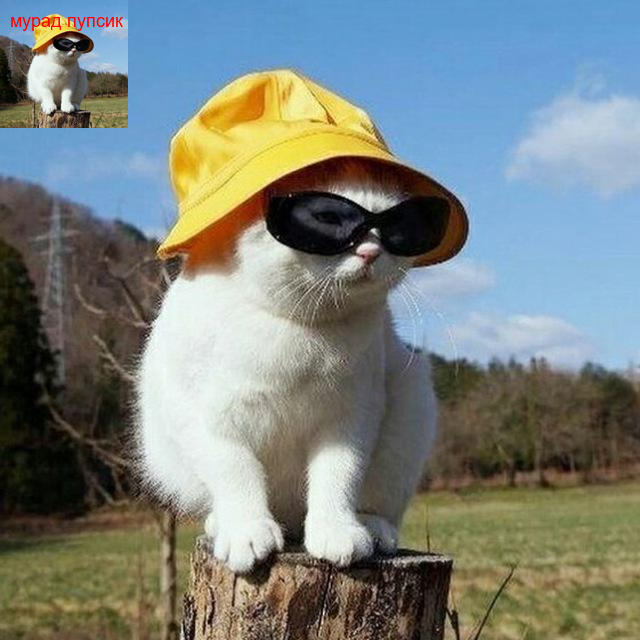

In [68]:
Image.fromarray(np_arr)

можно улучшить изображение - яркость, контрастность и т.п.
Color, Contrast, Brightness, Sharpness

In [92]:
from PIL import ImageEnhance

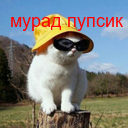

In [93]:
im1

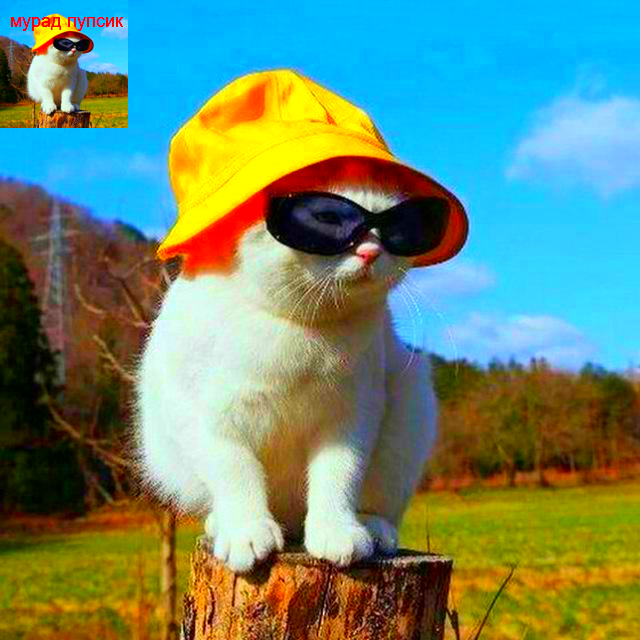

In [96]:
ImageEnhance.Color(im).enhance(3.5)

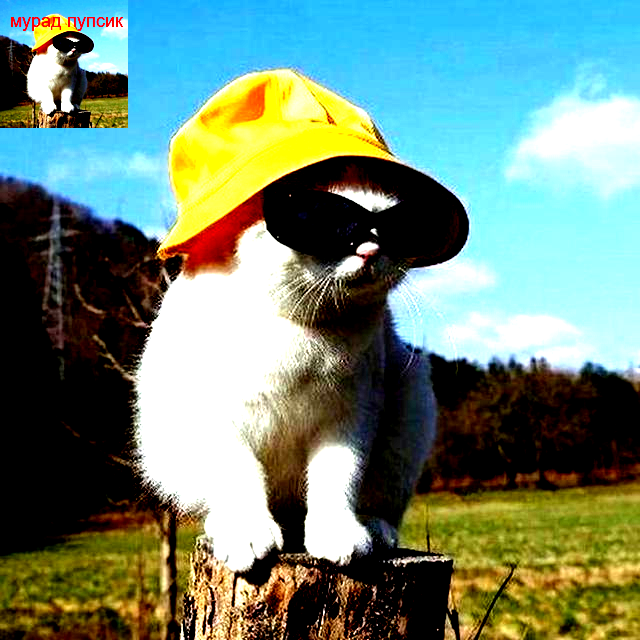

In [97]:
ImageEnhance.Contrast(im).enhance(2.5)

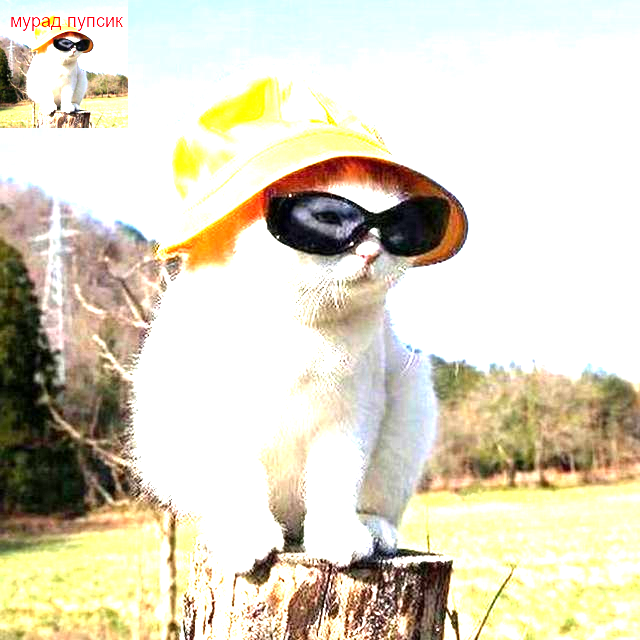

In [98]:
ImageEnhance.Brightness(im).enhance(2.5)

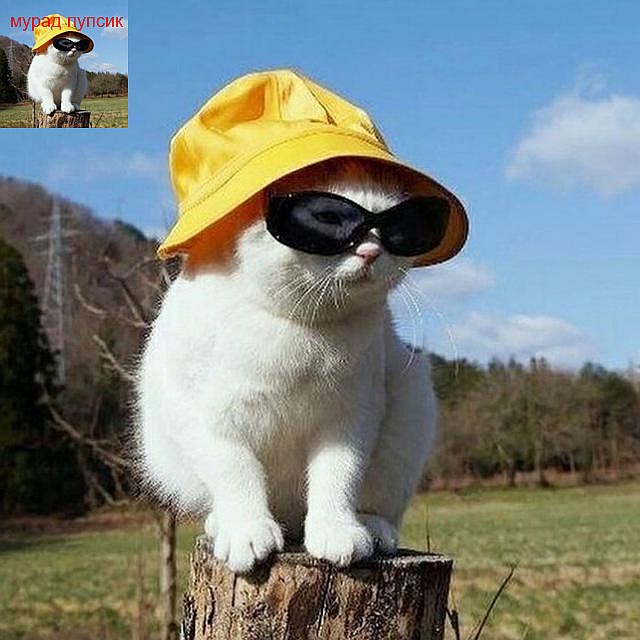

In [99]:
ImageEnhance.Sharpness(im).enhance(2.5)

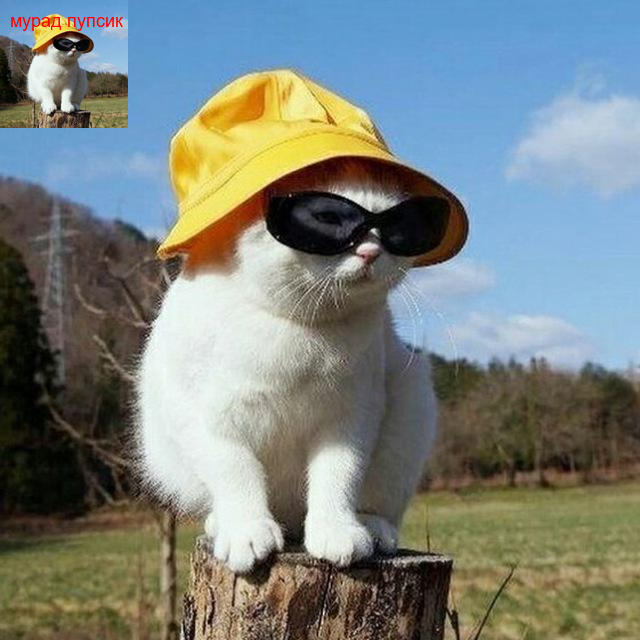

In [100]:
im

можно трансформировать изображение 

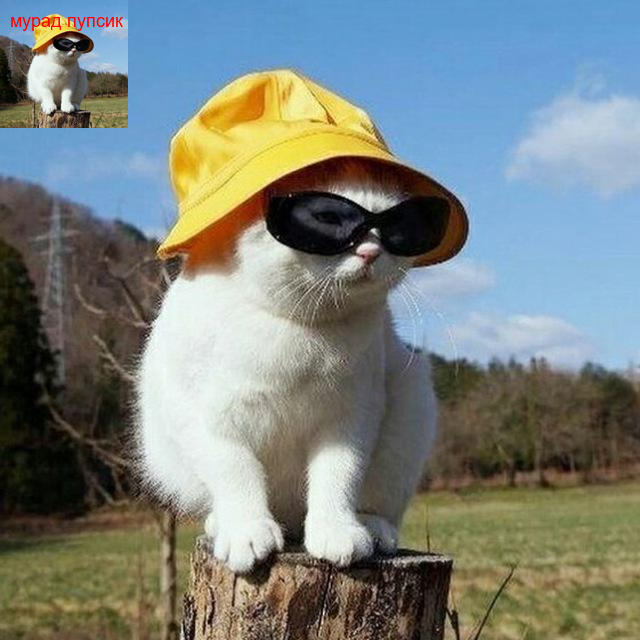

In [101]:
im

аффинное преобразование. (x, y) -> (ax + by + c, dx + ey + f), где a...f - коффициенты

In [103]:
im.transform(im.size, Image.AFFINE, (1, -2, 0.5*im.size[0], 0, 1, 0))

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [77]:
(1, 1) + (2, 2)

(1, 1, 2, 2)

обрезать по координатам и растянуть

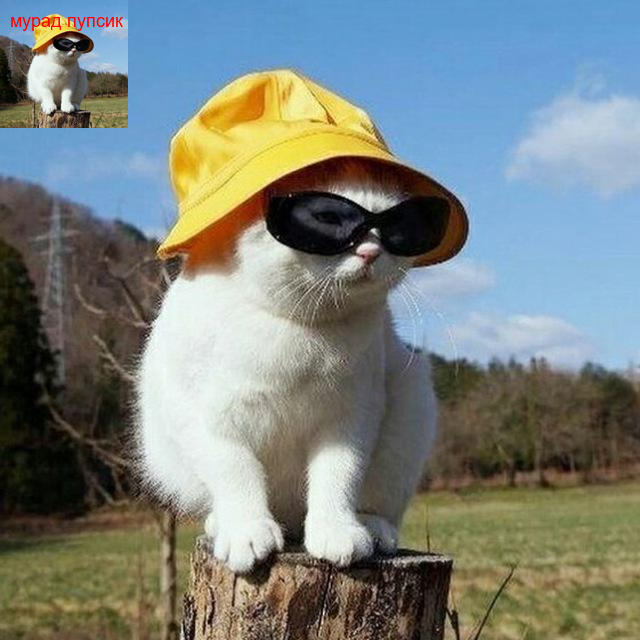

In [104]:
im

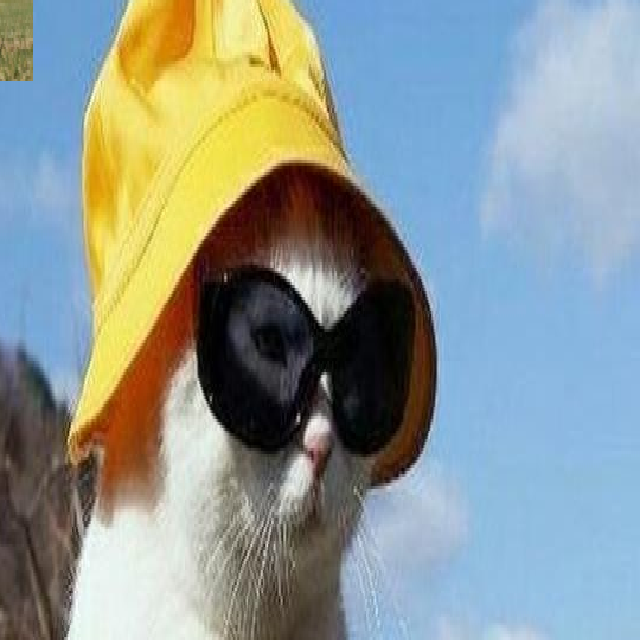

In [78]:
im.transform(im.size, Image.EXTENT, (100, 100, im.size[0], im.size[1]/2))

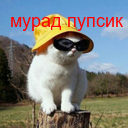

In [105]:
im1

In [107]:
im4 = Image.open("doggy.jpg").resize([128, 128])

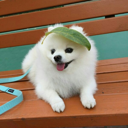

In [108]:
im4

In [109]:
r1, g1, b1 = im1.split()

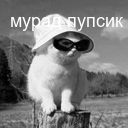

In [110]:
r1

In [111]:
r2, g2, b2 = im4.split()

In [115]:
im4.mode

'RGB'

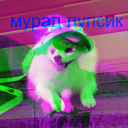

In [118]:
Image.merge("RGB", (g1, b2, r1))